# Setup

__Installation Instructions:__

`!pip install matplotlib`<br>
`!pip install scipy`<br>
`!pip install ffmpeg-python`<br>
`!pip install pydub`<br>
`!pip install speechrecognition`

(Mac) `!brew install ffmpeg`

In [1]:
import scipy.io.wavfile as wav
import speech_recognition as sr
from pydub import AudioSegment
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Audio
from pathlib import Path

from scipy.fftpack import fft,fftfreq

C:\Users\rharper\AppData\Local\Continuum\anaconda3\envs\audio_ml\lib\site-packages\pydub\utils.py:165: RuntimeWarning: Couldn't find ffmpeg or avconv - defaulting to ffmpeg, but may not work
  warn("Couldn't find ffmpeg or avconv - defaulting to ffmpeg, but may not work", RuntimeWarning)


-----

# Resources

[Python Audio Processing Tutorial](https://pythondsp.rob-elder.com/)<br>
[Making Music In Jupyter](https://blog.ouseful.info/2016/09/13/making-music-and-embedding-sounds-in-jupyter-notebooks/)<br>
[Applying Filters](https://ipython-books.github.io/116-applying-digital-filters-to-speech-sounds/)<br>
[Advanced Audio Processing - Librosa](https://github.com/librosa/librosa)
<br><br>
*This notebook designed from Matt Leffer's Tutorial Jupyter Notebook*

# Import Audio

In [2]:
# Best method for either Windows, Mac, Or Linux
data_folder = Path("")
audio_file = data_folder / "recordings" / "0_jackson_0.wav"
signal = np.random.random(750)
Audio(str(audio_file), rate=250)

## Method 1: w/ Google ML!

In [3]:
r = sr.Recognizer() 

with sr.AudioFile(str(audio_file)) as source:  
    audio = r.record(source)   
    try: 
        print("The audio file contains: " + r.recognize_google(audio)) 
    except sr.UnknownValueError: 
        print("Google Speech Recognition could not understand audio") 
    except sr.RequestError as e: 
        print("Could not request results from Google Speech Recognition service; {0}".format(e))

The audio file contains: 0


-------------

## Method 2: w/ Signal Processing

In [4]:
samplerate, data = wav.read(audio_file)
samples = data.shape[0]
print(f'SAMPLE RATE: {samplerate} \nSAMPLES: {data.shape[0]}')

SAMPLE RATE: 8000 
SAMPLES: 5148


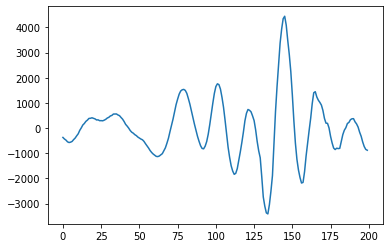

In [5]:
plt.plot(data[:200])

In [6]:
datafft = fft(data)
#Get the absolute value of real and complex component:
fftabs = abs(datafft)

In [7]:
freqs = fftfreq(samples,1/samplerate)

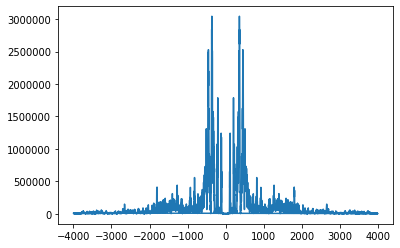

In [8]:
plt.plot(freqs,fftabs)

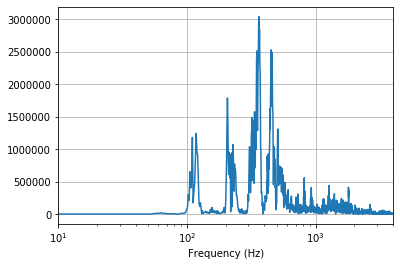

In [9]:
plt.xlim( [10, samplerate/2] )
plt.xscale( 'log' )
plt.grid( True )
plt.xlabel( 'Frequency (Hz)' )
plt.plot(freqs[:int(freqs.size/2)],fftabs[:int(freqs.size/2)])

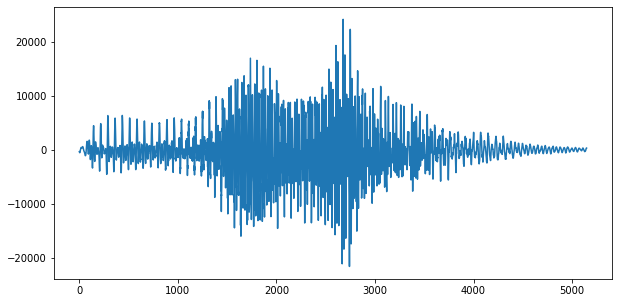

In [17]:
plt.figure(figsize=(10,5))
plt.plot(data) 
plt.show()